# Numerical Integration

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
%matplotlib inline

## Trapezoidal method

In [11]:
def trapezoidal_method(f, n, a, b):
    interval = np.linspace(a,b,num=n)
    f_interval = np.array((list(map(f,interval))))
    totSum = sum(2*f_interval[1:(n-1)]) + f_interval[0] + f_interval[n-1]
    h = (b-a)/n
    area = totSum*(h/2)
    return(area)
    

In [12]:
def f(x):
    return(x**2)

In [13]:
a = 0
b = 2
n = 10000
interval = np.linspace(a,b,num=n)

In [38]:
trapezoidal_method(f,1000, 1,3)

8.664933386677324

## Simpson's rule (Newton-Coates with n=2)

In [39]:
def simpons_method(f, n, a, b):
    interval = np.linspace(a,b,num=n)
    f_interval = np.array(list(map(f,interval)))
    totSum = sum(f_interval[0:-1:2]) +  sum(4 * f_interval[1::2]) + sum(f_interval[2::2])
    h = (b-a)/n
    area = totSum*(h/3)
    return(area)
    

In [42]:
simpons_method(f,1000, 1,3)

8.670004004004

In [69]:
L = np.arange(1000,20000, 1000)

In [71]:
trap_results = []
simpson_results = []

for i in L:
    trap_results.append(trapezoidal_method(f,i, 1,3))
    simpson_results.append(simpons_method(f,i, 1,3))

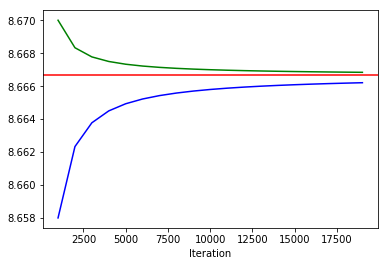

In [83]:
plt.plot(L,trap_results,c='blue')
plt.plot(L,simpson_results, c='green')
plt.xlabel('Iteration')
axes = plt.gca()
axes.axhline(y=26/3,c='red')
plt.show()

## Gaussain Quadrature

In [51]:
import scipy

In [55]:
scipy.integrate.quadrature(f, 0, 2, maxiter = 4)

(2.6666666666666665, 4.440892098500626e-16)

## Monte Carlo Integration

In [57]:
def mcIntegration(f, n, a, b):

    rand_unif_samples = np.random.uniform(a, b, n)
    f_interval_mean = np.mean(np.array(list(map(f,rand_unif_samples))))
    area = f_interval_mean * (b-a)
    return(area)

In [64]:
mcIntegration(f,100000, 1,3)

8.663628440036778

## Importance Sampling

In [85]:
import scipy.stats as stats
from scipy.stats import truncnorm

In [86]:
r = truncnorm.rvs(0, 1, size=1000000)

In [87]:
np.mean(r)

0.45954830626149407

In [88]:
n = 100000
y = stats.uniform.rvs(size=n)
mean = 1.0/n * np.sum(y * stats.norm().pdf(y)/(stats.norm.cdf(1) - stats.norm.cdf(0)))

print(mean)

0.46063352276334885


## Markov Chain Monte Carlo (MCMC) Integration

### Metropolis Hastings Algorithm

In [ ]:
Sample from Cauchy distribution based on standard normal proposal distribution

In [ ]:
def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples

### Gibbs Sampling

In [ ]:
import random,math
 
def gibbs(N=50000,thin=1000):
    x=0
    y=0
    print "Iter  x  y"
    for i in range(N):
        for j in range(thin):
            x=random.gammavariate(3,1.0/(y*y+4))
            y=random.gauss(1.0/(x+1),1.0/math.sqrt(2*x+2))
        print i,x,y
 
gibbs()